In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


 

importing libaries

In [ ]:
pip install wordcloud

Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
from wordcloud import WordCloud


importing dataset

In [ ]:
import pandas as pd
netflix = pd.read_csv("/dbfs/FileStore/shared_uploads/devipriya.ravi@sjsu.edu/netflix1-2.csv")

In [ ]:
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
netflix.isna().any()

Out[4]: show_id         False
type            False
title           False
director        False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
dtype: bool

In [ ]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Displaying whcih content is more. which is the TV and Movie

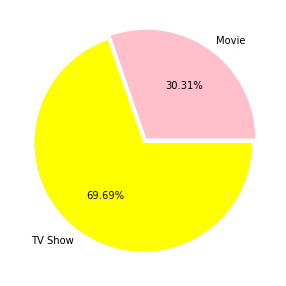

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.pie(netflix['type'].value_counts().sort_values(),labels=netflix['type'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['pink','yellow'])
plt.show()

In [ ]:
top10country = netflix['country'].head(10)
top10country

Out[7]: 0     United States
1            France
2     United States
3            Brazil
4     United States
5    United Kingdom
6     United States
7             India
8           Germany
9             India
Name: country, dtype: object

release year statistics

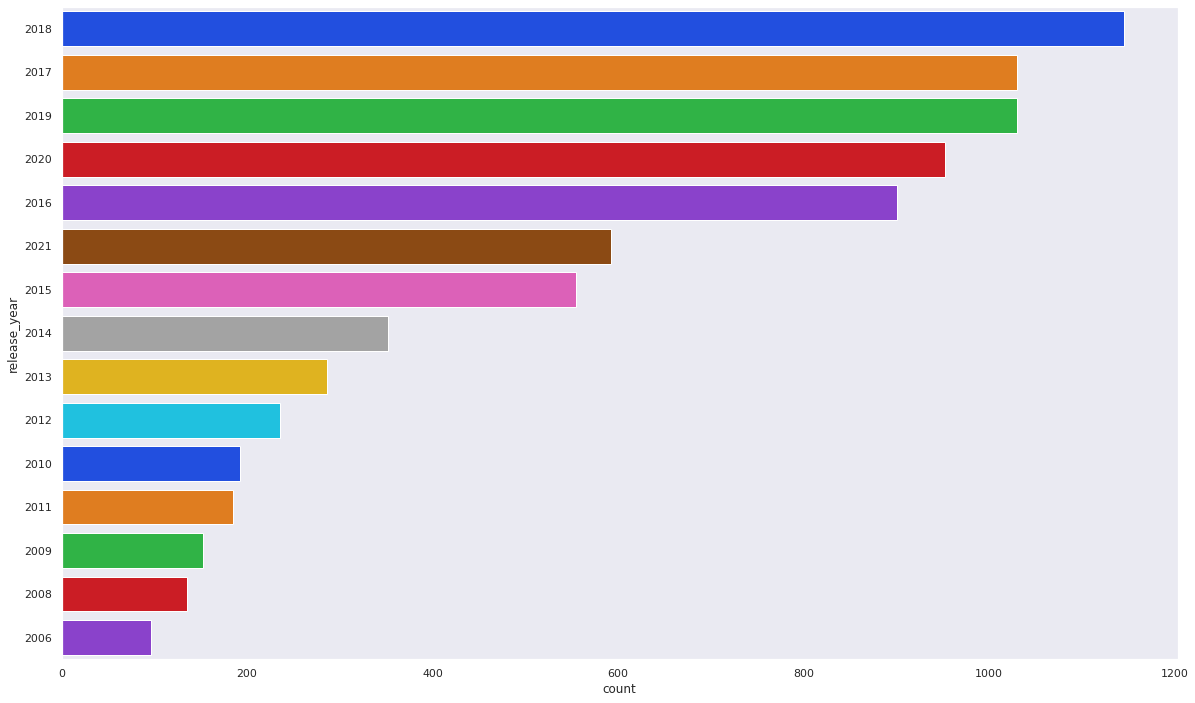

In [ ]:

plt.figure(figsize=(20,12))
sns.set(style="dark")
ax = sns.countplot(y="release_year", data=netflix, palette="bright", order=netflix['release_year'].value_counts().index[0:15])

In [ ]:
col = netflix.columns       # .columns gives columns names in data 
print(col)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


Number of movies in each country statistics

Out[10]: Text(0.5, 0, 'Number of movies in the country')

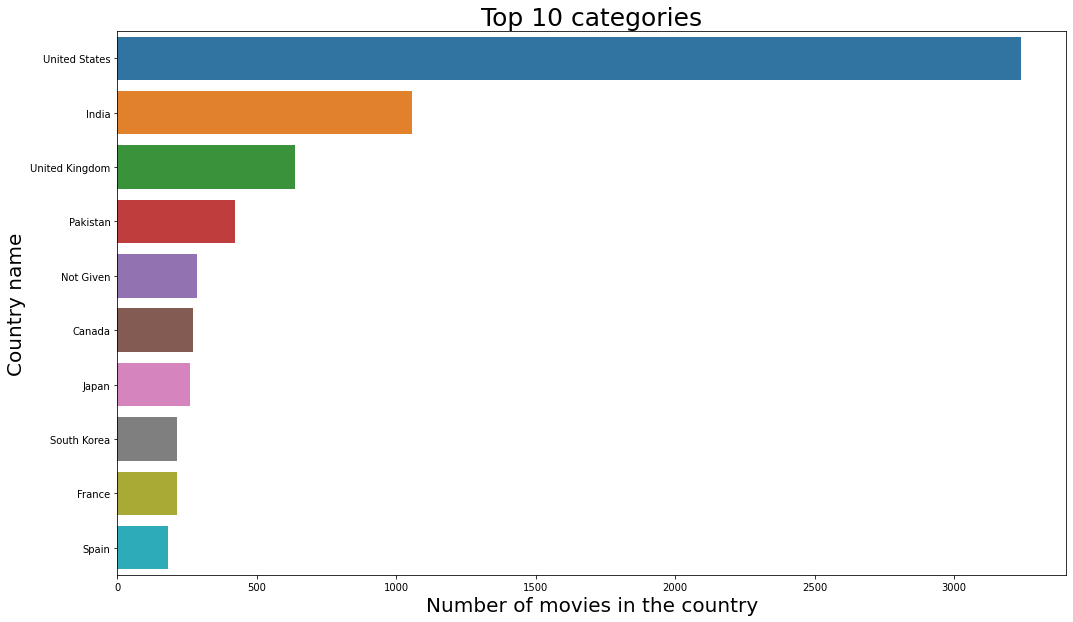

In [ ]:
import seaborn as sns
plt.figure(figsize=(17,10))
sns.countplot(y = netflix.country, \
              order = netflix.country.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 categories', fontsize = 25)
plt.ylabel('Country name', fontsize = 20)
plt.xlabel('Number of movies in the country', fontsize = 20)

In [ ]:
netflix.isna().sum()

Out[11]: show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

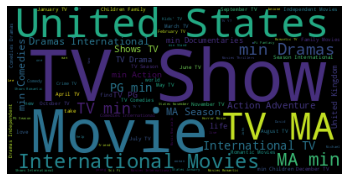

In [ ]:
text = open("/dbfs/FileStore/shared_uploads/devipriya.ravi@sjsu.edu/netflix_titles.csv").read()

wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

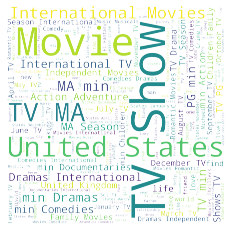

In [ ]:
wordcloud = WordCloud(width=4000, 
                      height=4000,
                      prefer_horizontal=0.5,
                      background_color="rgba(255, 255, 255, 0)", 
                      mode="RGBA").generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()